In [45]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
feature = pd.read_csv("./features.csv")
feature = feature.drop('Unnamed: 0', 1)

In [15]:
feature_raw = pd.read_csv("./feature_raw.csv")
feature_raw = feature_raw.drop('Unnamed: 0', 1)

In [108]:
feature

,vis,r_fri_follow,avg_fav,frequency,label
0,0.164286,0.266114,0.925770,0.000306,1
1,0.578571,0.672932,3.685514,0.015026,1
2,0.164286,1.037681,0.037716,0.015753,1
3,0.245714,0.214371,2.944980,0.006128,0
4,0.164286,0.587054,0.110839,0.009781,0
...,...,...,...,...,...
266198,0.264286,0.248337,0.266802,0.001994,1
266199,0.081429,0.448549,5.806159,0.000793,0
266200,0.164286,0.552846,0.151943,0.009021,0
266201,0.330000,0.144140,1.883822,0.015576,1


In [40]:
feature_raw

,_id,friends_count,listed_count,favourites_count,statuses_count,followers_count
0,423108474,345,1,1330,35264,358
1,2598356918,4996,1,25639,8706,1071
2,356977475,4010,3,68281,36246,578
3,353576074,1086,0,661,714,289
4,2494785421,448,10,1585,14300,263
...,...,...,...,...,...,...
267462,3334130291,1874,0,13188,868,834
267463,833738070,238,0,6286,17738,378
267464,144278441,451,8,1449,5431,112
267465,788044945949069313,379,0,3205,552,170


In [143]:
feature

,vis,r_fri_follow,avg_fav,frequency,label
0,0.164286,0.266114,0.925770,0.000306,1
1,0.578571,0.672932,3.685514,0.015026,1
2,0.164286,1.037681,0.037716,0.015753,1
3,0.245714,0.214371,2.944980,0.006128,0
4,0.164286,0.587054,0.110839,0.009781,0
...,...,...,...,...,...
266198,0.264286,0.248337,0.266802,0.001994,1
266199,0.081429,0.448549,5.806159,0.000793,0
266200,0.164286,0.552846,0.151943,0.009021,0
266201,0.330000,0.144140,1.883822,0.015576,1


## Normalization

In [144]:
feature_normalized = preprocessing.normalize(feature.iloc[:,[0,1,2,3]])

In [94]:
feature_raw_normalized = preprocessing.normalize(feature_raw.iloc[:,[1,2,3,4,5]])

In [145]:
feature_normalized

array([[1.68124328e-01, 2.72332065e-01, 9.47401371e-01, 3.13376153e-04],
       [1.52621678e-01, 1.77513192e-01, 9.72203672e-01, 3.96371917e-03],
       [1.56254200e-01, 9.86951544e-01, 3.58717007e-02, 1.49831622e-02],
       ...,
       [2.75422381e-01, 9.26836717e-01, 2.54730261e-01, 1.51230415e-02],
       [1.72054716e-01, 7.51512325e-02, 9.82183036e-01, 8.12101734e-03],
       [1.09015613e-02, 2.92769085e-02, 9.99511889e-01, 5.11616721e-05]])

In [163]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='auto')
coord = acp.fit_transform(feature_normalized)

In [164]:
acp.explained_variance_ratio_

array([0.82159314, 0.14001428, 0.0358075 , 0.00258508])

In [166]:
coord

array([[ 6.17186495e-01, -9.19795739e-03, -1.69452102e-02,
        -4.50703413e-03],
       [ 6.98656165e-01, -2.15717444e-03,  3.92294316e-02,
        -3.88827853e-04],
       [-5.38988668e-01, -7.88068108e-03,  5.48046788e-02,
         1.20735035e-03],
       ...,
       [-3.36532014e-01,  6.76804294e-02, -8.30924531e-02,
         1.58119145e-03],
       [ 7.73577874e-01,  4.29979840e-02,  9.67208137e-02,
         3.48091563e-03],
       [ 8.18901540e-01, -9.75386872e-02,  1.78014753e-01,
        -1.68721608e-03]])

## KMeans cluster (MiniBatchKMeans)

In [167]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(coord[:,[0,1]])
# np.unique(kmeans.labels_, return_counts=True)

In [168]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([109308, 156895], dtype=int64))

In [169]:
labels0 = coord[labels == 0]
labels1 = coord[labels == 1]

In [175]:
coord

array([[ 6.17186495e-01, -9.19795739e-03, -1.69452102e-02,
        -4.50703413e-03],
       [ 6.98656165e-01, -2.15717444e-03,  3.92294316e-02,
        -3.88827853e-04],
       [-5.38988668e-01, -7.88068108e-03,  5.48046788e-02,
         1.20735035e-03],
       ...,
       [-3.36532014e-01,  6.76804294e-02, -8.30924531e-02,
         1.58119145e-03],
       [ 7.73577874e-01,  4.29979840e-02,  9.67208137e-02,
         3.48091563e-03],
       [ 8.18901540e-01, -9.75386872e-02,  1.78014753e-01,
        -1.68721608e-03]])

In [130]:
labels0 = feature_normalized[labels == 0]
labels1 = feature_normalized[labels == 1]

In [95]:
kmeans1 = KMeans(n_clusters=2, random_state=0)
labels = kmeans1.fit_predict(feature_raw_normalized)

In [96]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([151419, 116048], dtype=int64))

In [97]:
labels0_raw = feature_raw[labels == 0]
labels1_raw = feature_raw[labels == 1]

In [139]:
labels0[:,1][:10]

array([0.9846166 , 0.98789297, 0.99653523, 0.99999744, 0.9929264 ,
       0.99905045, 0.99691786, 0.99888973, 0.9988861 , 0.9854889 ])

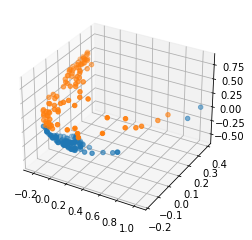

In [158]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(labels0[:,1][:100], labels0[:,2][:100], labels0[:,0][:100])
ax.scatter(labels1[:,1][:100], labels1[:,2][:100], labels1[:,0][:100])

In [172]:
labels0

array([[ 6.17186495e-01, -9.19795739e-03, -1.69452102e-02,
        -4.50703413e-03],
       [ 6.98656165e-01, -2.15717444e-03,  3.92294316e-02,
        -3.88827853e-04],
       [ 7.85346352e-01, -4.17619070e-02,  1.24715540e-01,
        -9.30727284e-04],
       ...,
       [ 7.85353915e-01, -1.07795087e-01,  1.45386213e-01,
        -1.65352647e-03],
       [ 7.73577874e-01,  4.29979840e-02,  9.67208137e-02,
         3.48091563e-03],
       [ 8.18901540e-01, -9.75386872e-02,  1.78014753e-01,
        -1.68721608e-03]])

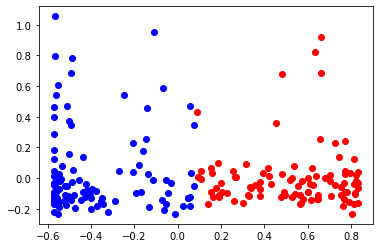

In [192]:
plt.scatter(np.random.choice(labels0[:,0],100), np.random.choice(labels0[:,1],100), c='red')
plt.scatter(np.random.choice(labels1[:,0],100), np.random.choice(labels1[:,1],100), c='blue')

In [179]:
a = np.random.choice(labels0[:,0],100)

In [180]:
a.shape

(100,)